# Ecuaciones diferenciales de primer órden

En esta sección nos enfocaremos al problema numérico de resolver $\mathbf{y}^\prime = \mathbf{F}(x,\mathbf{y})$ con las condiciones auxiliares $\mathbf{y}(a) = \alpha$.

	
Nuestro punto de partida es la forma general que tiene una ecuación diferencial de primer órden

\begin{equation}
y^\prime = f(x,y)
\end{equation}

donde $y^\prime = dy/dx$ y $f(x,y)$ es una función dada. Resolver esta ecuación diferencial, es equivalente a hacer una integral, por lo tanto la solución se conocerá hasta una constante de integración. Para determinar esta constante necesitamos conocer a la función en un punto, por lo que se usa la condición auxiliar 

\begin{equation}
y(a) = \alpha.
\end{equation}

Una ecuación diferencial de órden $n$,

\begin{equation}
y^{(n)} = f(x,y,y^{\prime},\ldots ,y^{(n-1)}),
\end{equation}

puede ser transformada en $n$ ecuaciones de primer órden. Usando la notación

\begin{equation}
y_0 = y, ~~~~~ y_1 = y^\prime, ~~~~~ y_2 = y^{\prime\prime}, \cdots  y_{n-1} = y^{(n-1)},
\end{equation}

las $n$ ecuaciones diferenciales de primer órden equivalentes son

\begin{equation}
y_0^\prime = y_1, ~~~~~ y_1^\prime = y_2, ~~~~~ y_2^\prime = y_3, \cdots  y_{n}^\prime = f(x,y_0,y_1,\ldots ,y_{n-1}). 
\label{eq:ecdiff1}
\end{equation}


Ahora para resolver las n-ecuaciones diferenciales necesitamos $n$ condiciones auxiliares. Estas condiciones pueden darse en el mismo punto $x$ o en diferentes valores de $x$.

* **Problema de valor inicial**. Condiciones auxiliares se especifican en el mismo punto $x$, es un *problema de valor inicial*. Las condiciones auxiliares, llamadas *condiciones iniciales*, tienen la forma

\begin{equation}
y_0(a) = \alpha_0, ~~~~~ y_1(a) = \alpha_1, \cdots  y_{n-1} = \alpha_{n-1}. \label{eq:ecdiff2}
\end{equation}

* **Problema de valor de frontera**. Condiciones auxiliares se especifican en diferentes puntos $x$, es un *problema de valor de frontera*. Las condiciones auxiliares son llamadas *condiciones de frontera*.

Por ejemplo

$$
y^{\prime\prime} = -y ~~~\mbox{con} ~~~ y(0)=1, y^\prime(0)=0,
$$

es un problema de valor inicial porque ambas condiciones auxiliares se imponen en la solución en el mismo valor $x=0$.

Pero, el problema

$$
y^{\prime\prime} = -y ~~~\mbox{con} ~~~ y(0)=1, y(\pi)=0,
$$

es un problema de valor de frontera, porque ambas condiciones se especifican en diferentes valores de $x$.

Aqui nos enfocaremos en los problemas de valor inicial.

## Problemas de valor inicial - Notación


Usaremos notación vectorial, puesto que nos permite manipular conjuntos de ecuaciones diferenciales de primer órden, de forma concisa. 


Por ejemplo, las n-ecuaciones equivalentes y las condiciones auxiliares se pueden escribir como

\begin{equation}
\mathbf{y}^\prime = \mathbf{F}(x,\mathbf{y})~~~~\mbox{con}~~~~\mathbf{y}(a) = \mathbf{\alpha},
\end{equation}

donde 

\begin{eqnarray}
\mathbf{y} = \begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{n-1}
\end{bmatrix}, ~~~ \mathbf{\alpha} = \begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_{n-1}
\end{bmatrix}, ~~~ \mathbf{F}(x,\mathbf{y}) = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
f(x,\mathbf{y})
\end{bmatrix}.
\end{eqnarray}

La solución numérica de las ecuaciones diferenciales, es escencialmente una tabla de valores de $x$ y de $\mathbf{y}$, para valores discretos de $x$.





# Método de Euler

Es un método simple basado (de nuevo) en la serie de Taylor truncada de $\mathbf{y}$ alrededor de $x$:
\begin{equation}
\mathbf{y}(x+h) \approx \mathbf{y}(x) + \mathbf{y}^{\prime}(x)~h.
\end{equation}

Como esta ecuación predice $\mathbf{y}$ en $x+h$, a partir de la información que tenemos en $x$, podemos usarla para mover la solución hacia adelante en pasos de $h$, comenzando con los valores iniciales de $x$ y $\mathbf{y}$.

El error que se comete al truncar la serie de Taylor es
\begin{equation}
\mathbf{E} = \frac{1}{2} \mathbf{y}^{\prime\prime}(\xi) h^2 = \mathcal{O}(h^2), ~~~~~ x<\xi < x+h.
\end{equation}

Pero el error acumulado $\mathbf{E}_{ac}$, asumiendo que en cada paso el error es constante, es 
\begin{equation}
\mathbf{E}_{ac} = n\mathbf{E} = \frac{x_n-x_0}{h} \mathbf{E} = \mathcal{O}(h)
\end{equation}

El método de Euler casi no se usa, precisamente porque el error de truncamiento acumulado es muy costoso. Pero la importancia del método es su simplicidad, lo que lo hace didáctico y útil en discusiones sobre estabilidad.

## Algoritmo para el Método de Euler


La función *eulerint* sirve para resolver problemas de valor inicial con el Método de Euler. Puede resolver cualquier cantidad de ecuaciones diferenciales de primer órden. Los usuarios deber dar la función *F(x,y)* que contiene las ecuaciones diferenciales en un arreglo de la forma:

\begin{eqnarray}
\mathbf{F}(x,\mathbf{y}) = \begin{bmatrix}
y^{\prime}_0 \\
y^{\prime}_1 \\
y^{\prime}_2 \\
\vdots 
\end{bmatrix}.
\end{eqnarray}

La función entrega los arreglos *X* y *Y* que contienen los valores de $x$ y $\mathbf{y}$ en intervalos de $h$.

Definimos la función *eulerint* con entradas: las condiciones iniciales $x$ y $y$, con el valor terminal de $x$ que se llama *xStop*, con el incremento en $x$ denominado *h* y con la función que nos da el usuario *F*. 

In [1]:
def eulerint(F,x,y,xStop,h):
  X=[]
  Y=[]
  X.append(x)
  Y.append(y)
  while x<xStop:
    h=min(h,xStop-x)
    y=y+h*F(x,y)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)  

Definimos la función *imprimeSol* para imprimir *X* y *Y* que se obtienen como solución de la integración numérica. 

In [2]:
def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1

In [3]:
if frec == 0: frec = m
imprimeEncabezado(n)
for i in range(0,m,frec):
    imprimeLinea(X[i],Y[i],n)
if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)

NameError: name 'frec' is not defined

El parámetro libre *frecuencia* que controla la cantidad de datos a imprimir. Por ejemplo si *frecuencia = 4* se imprime cada cuarto paso de integración. Si *frecuencia = 0* solo se muestra el valor inicial y el final.	

# Ejemplo 1: Método de Euler


Resolver el problema de valor inicial

$$
y^{\prime\prime} = -0.1y^{\prime} - x ~~~ \mbox{con} ~~~ y(0)=0, y^\prime(0)=1
$$

de $x=0$ hasta $x=2$ con el paso $h=0.05$. Grafica la $y$ calculada junto con la solución analítica

$$
y = 100 x - 5x^2 + 990(e^{-0.1x} - 1).
$$

En la notación que hemos usado $y_0 =y$ y $y_1=y^\prime$, las ecuaciones de primer orden y las condiciones iniciales son:

\begin{eqnarray*}
\mathbf{F}(x,\mathbf{y}) = \begin{bmatrix}
y^\prime_0 \\
y^\prime_1 
\end{bmatrix} =\begin{bmatrix}
y_1 \\
-0.1y_1 - x 
\end{bmatrix}~~~~~~ \mathbf{y}(0) = \begin{bmatrix}
0 \\
1 
\end{bmatrix}
\end{eqnarray*}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
def eulerint(F,x,y,xStop,h):
  X=[]
  Y=[]
  X.append(x)
  Y.append(y)
  while x<xStop:
    h=min(h,xStop-x)
    y=y+h*F(x,y)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)  

def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1
  if frec == 0: frec = m
  imprimeEncabezado(n)
  for i in range(0,m,frec):
   imprimeLinea(X[i],Y[i],n)
  if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)


La solución es

 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00    0.0000e+00    1.0000e+00 
   2.0000e-01    1.9801e-01    9.6520e-01 
   4.0000e-01    3.8611e-01    8.9139e-01 
   6.0000e-01    5.5658e-01    7.7934e-01 
   8.0000e-01    7.0181e-01    6.2982e-01 
   1.0000e+00    8.1438e-01    4.4356e-01 
   1.2000e+00    8.8698e-01    2.2130e-01 
   1.4000e+00    9.1247e-01   -3.6247e-02 
   1.6000e+00    8.8384e-01   -3.2838e-01 
   1.8000e+00    7.9424e-01   -6.5442e-01 
   2.0000e+00    6.3692e-01   -1.0137e+00 

El error es
   x       y    yExacta  Error  Error acumulado
-----------------------------------------------------
0.0000  0.0000  0.0000  0.0000  0.0000
0.0500  0.0500  0.0499  0.2920  0.2920
0.1000  0.0998  0.0993  0.4174  0.7094
0.1500  0.1491  0.1483  0.5434  1.2529
0.2000  0.1980  0.1967  0.6706  1.9235
0.2500  0.2463  0.2443  0.7993  2.7227
0.3000  0.2938  0.2911  0.9297  3.6524
0.3500  0.3404  0.3369  1.0622  4.7146
0.4000  0.3861  0.3815  1.1973  5.9120
0.4500  0.4307  0.4250

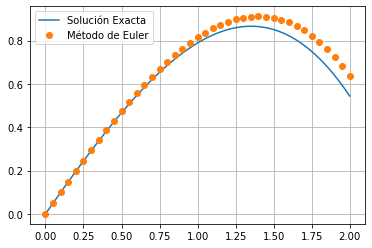

In [5]:
def F(x,y):
  F=np.array([y[1],-0.1*y[1]-x])
  return F

y=np.array([0.0,1.0])
X,Y=eulerint(F,0.0,y,2.0,0.05)
print("La solución es")
imprimeSol(X,Y,4)
def yExacta(x):
  return 100.0*x-5.0*x**2+990.0*(e**(-0.1*x)-1)
print()
print("El error es")
Eac=0.0
print("   x       y    yExacta  Error  Error acumulado")
print("-----------------------------------------------------")
print("%.4f  %.4f  %.4f  %.4f  %.4f" %(X[0],Y[0,0],yExacta(Y[0,0]),0.0,Eac))
for i in range(1,len(X)):
  E=abs((Y[i,0]-yExacta(X[i]))/yExacta(X[i]))*100
  Eac=Eac+E
  print("%.4f  %.4f  %.4f  %.4f  %.4f" %(X[i],Y[i,0],yExacta(X[i]),E,Eac))
x1=np.arange(0.0,2.0,0.001)
plt.plot(x1,yExacta(x1),label="Solución Exacta")
plt.plot(X,Y[:,0],"o",label="Método de Euler")
plt.grid()
plt.legend()
plt.show()